In [36]:
# Importing Libraries for parfume project
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import ast 

mens_parfumes = pd.read_csv('mens_sales_cleaned_dataset.csv')

mens_parfumes

,brand,title,type,price,sold,type_cleaned
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,eau de parfum,84.99,116.0,Eau de Parfum
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,eau de parfum,109.99,48.0,Eau de Parfum
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,eau de toilette,100.00,27.0,Eau de Toilette
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,eau de toilette,44.99,159.0,Eau de Toilette
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,fragrances,16.91,156.0,Other
...,...,...,...,...,...,...
989,GUESS,Guess 1981 by Guess cologne for men EDT 3.3 / ...,eau de toilette,20.28,1613.0,Eau de Toilette
990,Armaf,Club de Nuit Intense by Armaf cologne for men ...,eau de toilette,30.58,31.0,Eau de Toilette
991,Paco Rabanne,Invictus by Paco Rabanne for Men EDT Spray 3.4...,eau de toilette,39.99,305.0,Eau de Toilette
992,Lomani,"Lomani EDT Cologne 3.4 oz Men - Authentic, Bra...",eau de toilette,9.99,22.0,Eau de Toilette


In [37]:
# C.K is same as Calvin Klein, so we will repalce it

mens_parfumes['brand'] = mens_parfumes['brand'].replace('C.K', 'Calvin Klein')

In [38]:
# Finding the most popular brand by number of sales on ebay

top_brand = mens_parfumes.groupby('brand')['sold'].sum().sort_values(ascending=False).reset_index().head(25)

top_brand = top_brand[top_brand['brand']!='Unbranded']


In [39]:
top_brand = top_brand[top_brand['brand'] != '2nd To None']

/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_20397/2775128998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brand, x='sold', y='brand', palette='magma')


Text(0.5, 0, 'Number of Sales')

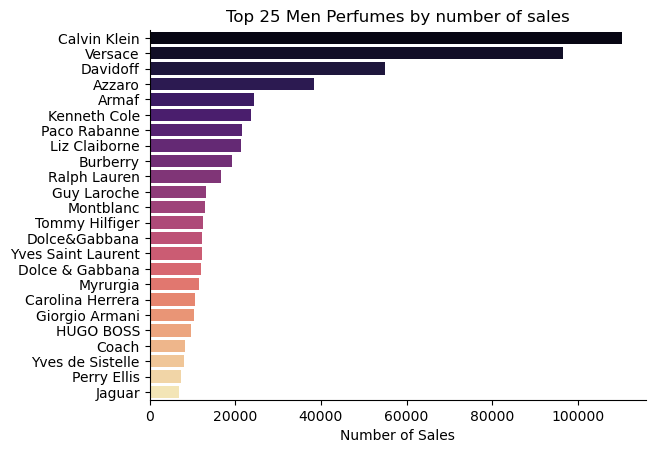

In [40]:
sns.barplot(data=top_brand, x='sold', y='brand', palette='magma')
sns.despine()

plt.title('Top 25 Men Perfumes by number of sales')
plt.ylabel('')
plt.xlabel('Number of Sales')


In [41]:
top_brand[top_brand['brand'] == 'Calvin Klein']

,brand,sold
0,Calvin Klein,110311.0


In [42]:
top_brand

,brand,sold
0,Calvin Klein,110311.0
1,Versace,96519.0
2,Davidoff,54944.0
3,Azzaro,38305.0
4,Armaf,24282.0
5,Kenneth Cole,23716.0
6,Paco Rabanne,21579.0
7,Liz Claiborne,21341.0
8,Burberry,19286.0
10,Ralph Lauren,16757.0


In [43]:
# Most popular perfume category

top_category = mens_parfumes.groupby('type_cleaned')['sold'].sum().sort_values(ascending=False).reset_index().head(6)

top_category = top_category[top_category['type_cleaned'] != 'Other']
top_category = top_category[top_category['type_cleaned'] != 'Body Spray']

In [44]:
top_category

,type_cleaned,sold
0,Eau de Toilette,564946.0
2,Eau de Parfum,67360.0
3,Cologne,42915.0
4,Perfume,6655.0


/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_20397/3037329593.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_category, x='type_cleaned', y='sold', palette='magma')


Text(0.5, -0.2, 'Typical fragrance concentrations for each type:\n1. Perfume (Parfum): 20% - 40%\n2. Eau de Parfum: 15% - 20%\n3. Eau de Toilette: 5% - 15%\n4. Cologne (Eau de Cologne): 2% - 4%')

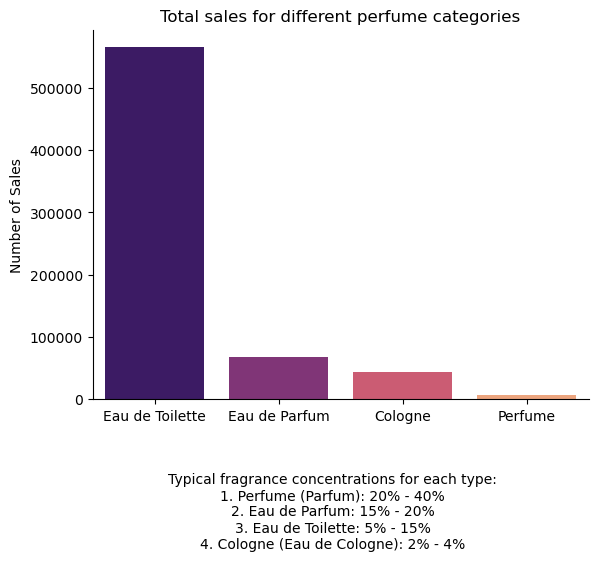

In [45]:
sns.barplot(data=top_category, x='type_cleaned', y='sold', palette='magma')
sns.despine()

plt.title('Total sales for different perfume categories')
plt.xlabel('')
plt.ylabel('Number of Sales')

plt.figtext(0.5, -0.2, """Typical fragrance concentrations for each type:
1. Perfume (Parfum): 20% - 40%
2. Eau de Parfum: 15% - 20%
3. Eau de Toilette: 5% - 15%
4. Cologne (Eau de Cologne): 2% - 4%""",
            ha="center", fontsize=10)

In [46]:
# Avg price for each type
med_category = mens_parfumes[mens_parfumes['type_cleaned'].isin(['Eau de Parfum', 'Eau de Toilette', 'Cologne', 'Perfume'])]

In [47]:
mens_parfumes

,brand,title,type,price,sold,type_cleaned
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,eau de parfum,84.99,116.0,Eau de Parfum
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,eau de parfum,109.99,48.0,Eau de Parfum
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,eau de toilette,100.00,27.0,Eau de Toilette
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,eau de toilette,44.99,159.0,Eau de Toilette
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,fragrances,16.91,156.0,Other
...,...,...,...,...,...,...
989,GUESS,Guess 1981 by Guess cologne for men EDT 3.3 / ...,eau de toilette,20.28,1613.0,Eau de Toilette
990,Armaf,Club de Nuit Intense by Armaf cologne for men ...,eau de toilette,30.58,31.0,Eau de Toilette
991,Paco Rabanne,Invictus by Paco Rabanne for Men EDT Spray 3.4...,eau de toilette,39.99,305.0,Eau de Toilette
992,Lomani,"Lomani EDT Cologne 3.4 oz Men - Authentic, Bra...",eau de toilette,9.99,22.0,Eau de Toilette


/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_20397/898038928.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=med_category, y='type_cleaned', x='price', palette='magma')


Text(0.5, 0, 'Price (USD)')

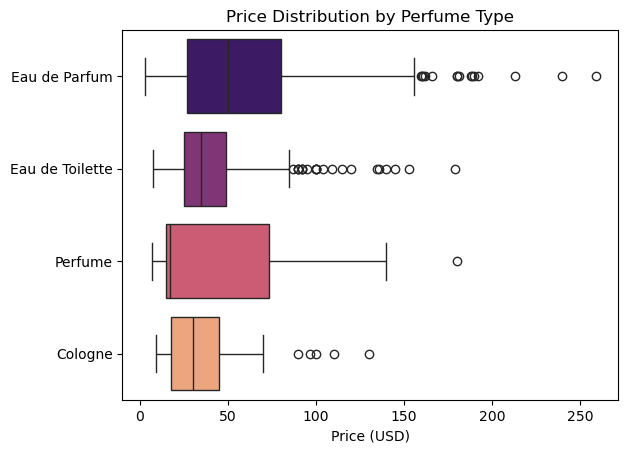

In [48]:
sns.boxplot(data=med_category, y='type_cleaned', x='price', palette='magma')

plt.ylabel('')
plt.title('Price Distribution by Perfume Type')
plt.xlabel('Price (USD)')


In [49]:
# Top 5 Most popular perfumes 

top5_selling = mens_parfumes.groupby('title')['sold'].sum().sort_values(ascending=False).reset_index().head(5)

top5_selling



,title,sold
0,Ck One by Calvin Klein Cologne Perfume Unisex ...,54052.0
1,Cool Water by Davidoff 4.2 oz EDT Cologne for ...,40394.0
2,Versace Eros by Gianni Versace 3.4 oz EDT Colo...,31718.0
3,Chrome by Azzaro 6.7 / 6.8 oz EDT Cologne for ...,30655.0
4,OBSESSION by Calvin Klein 4.0 oz 4 MEN edt Col...,24048.0
